In [1]:
import os
import errno
import random
import shutil
import zipfile
import skimage.io as io

import numpy as np
from tensorflow.python import keras

from deepcell.utils.data_utils import make_training_data
from deepcell.utils.data_utils import get_data
from deepcell.utils.io_utils import get_image_sizes
from deepcell.utils.export_utils import export_model
from deepcell.utils.train_utils import rate_scheduler
from deepcell.model_zoo import bn_feature_net_2D
from deepcell.model_zoo import bn_feature_net_skip_2D
from deepcell.training import train_model_sample
import matplotlib.pyplot as plt

/usr/local/lib/python3.5/dist-packages/deepcell/utils/__init__.py:49: UserWarning: To use `compute_overlap`, the C extensions must be built using `python setup.py build_ext --inplace`
  warnings.warn('To use `compute_overlap`, the C extensions must be built '


In [2]:
CHANNEL_AXIS = 3
training_data = np.load(os.path.join('/data/npz_data', 
                                     "Point1_12_18_23_3X_interior_border_border" + ".npz"))

X, y = training_data["X"], training_data["y"]
print("X.shape: {} & y.shape: {}".format(X.shape, y.shape))


X.shape: (4, 1024, 1024, 3) & y.shape: (4, 1024, 1024, 1)


In [3]:
hist = np.load('/data/models/20190525_class_balance/Point1_12_18_3X_interior_border_border_4_class_240k_max_class_examples_unbalanced.npz')
hist['loss_history'].tolist()['acc']

[0.7198594715478795,
 0.7335296253926641,
 0.736080901484977,
 0.7391216060542568,
 0.7405924948233,
 0.742157103937476,
 0.7434132169119917,
 0.7444636657935555,
 0.7465398317973911,
 0.7484676072551737,
 0.7488529020108522,
 0.7501714952163875,
 0.7507676607529404,
 0.7525444423179931,
 0.7526030175349716,
 0.7534660257233989,
 0.7547429654415361,
 0.7553039858485381,
 0.7560355252178548,
 0.7572044262034554,
 0.758007557504902,
 0.76220024133059,
 0.7691368486276327,
 0.7791701323676707,
 0.786663855056976,
 0.7950479210358671,
 0.8002923554142849,
 0.8037782316266119,
 0.8076689276697884,
 0.810675788780528,
 0.8128235467170367,
 0.8145196246497803,
 0.8159905134178925,
 0.8178245685284474,
 0.8185066443814303,
 0.8203602245639752,
 0.820925149985251,
 0.8222515532200323,
 0.82295705916021,
 0.8234699177220443]

In [54]:
MODEL_NAME = 'Point1_12_18_3X_interior_border_border' + '_4_class_240k_max_class_examples_unbalanced_epoch_25'
weights_path = os.path.join('/data/models/20190525_class_balance', 
                            MODEL_NAME + ".h5")

In [55]:
# Load the previously generated weights
# from deepcell import model_zoo

run_sample_model = bn_feature_net_2D(
    n_dense_filters=128,
    n_conv_filters=32,
    dilated=True,
    n_features=4,
    norm_method='std',
    receptive_field=61,
    n_channels=3,    
    input_shape=tuple(X.shape[1:]))

run_sample_model.load_weights(weights_path)

In [56]:
test_images = run_sample_model.predict(X[:, :, :, :])

print('model output shape:', test_images.shape)

model output shape: (4, 1024, 1024, 4)


In [57]:
np.save('/data/models/20190525_class_balance/' + MODEL_NAME + '_metrics', test_images)

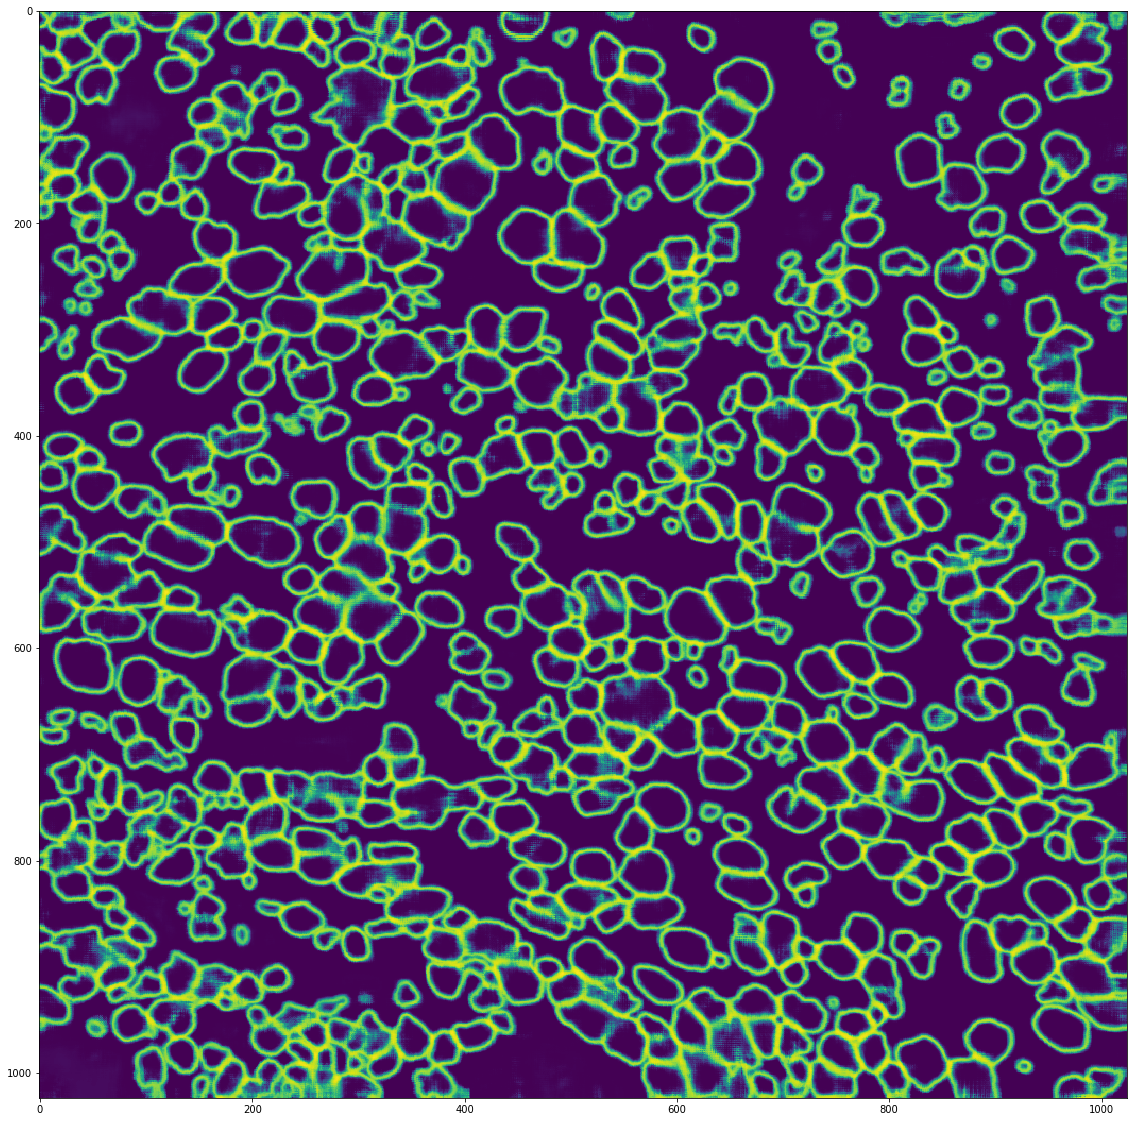

In [58]:
plt.figure(figsize = (20, 20))
# plt.imshow(test_images[2, :, :, 3] - test_2[2, :, :, 3])
# plt.colorbar()
#plt.imshow(test_images[3, :, :, 0])
#plt.imshow(test_images[3, :, :, 1])
plt.imshow(test_images[3, :, :, 0] + test_images[3, :, :, 1])



In [ ]:
# import copy
# test_2 = copy.copy(test_images)
test_2 = np.load('/data/models/' + 'Point1_12_18_3X_interior_save_10' + '_metrics.npy')